# **Simple Linear Regression**
 ###  Problem Statement : 
Predict the percentage of and student based on the no. of study hours
This is a simple linear regression task as it involves just two variables.

### Author : Gita Iwane

In [20]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [12]:
# Reading data from link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


### Inspecting First ten elements from the imported dataset

In [13]:
s_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Representing the dimensionality of the DataFrame

In [102]:
s_data.shape

(25, 2)

### Correlation between hours studied and scores obtained by students

In [15]:
s_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Correlation vizualitation

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


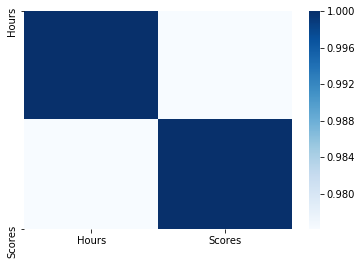

In [67]:
sns.heatmap(s_data.corr(),cmap="Blues")
corr_matrix=s_data.corr()
print(corr_matrix)

### Note
 From the above correlation data it can be cleared that number of hour studied have a high postive correlation with the mark obtained

### Description of the dataset

In [68]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Checking for null values

In [71]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Plotting Hours vs Scores

##### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

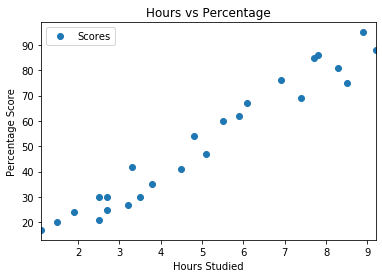

In [72]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Note
it is observed that there is a linear relationship between hours and scores, as the number of hour increases there is also an increase in score obtained.

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [73]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values 

In [77]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [79]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Now split this data into training and test sets

In [74]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [75]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [80]:
regressor.coef_ 

array([9.91065648])

In [81]:
regressor.intercept_

2.018160041434683

In [82]:
# checking the accuracy of model
print("Accuracy : ",regressor.score(X_train, y_train)*100)


Accuracy :  95.15510725211553


### Plotting the Regression Line


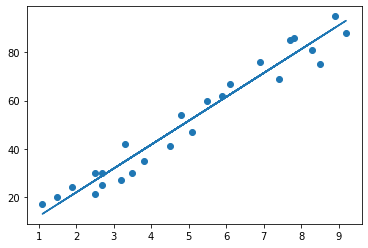

In [86]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [105]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) 


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Comparing Actual vs Predicted score

In [106]:
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



## What will be predicted score if a student studies for 9.25 hrs/ day?

In [95]:
hours = 9.25
pred = regressor.coef_*hours+regressor.intercept_
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [96]:
y_pred=regressor.predict([[hours]])
y_pred

array([93.69173249])

## Evaluating the model

In [107]:
#Mean absolute Error
from sklearn import metrics
print("Mean absolute error : ", metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error :  4.183859899002975


In [109]:
#Root Mean square Error
print("Root Mean square error : ", metrics.mean_squared_error(y_test, y_pred))

Root Mean square error :  21.5987693072174
